In [27]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

class Edge:
    def __init__(self, src, dest, weight):
        self.src = src
        self.dest = dest
        self.weight = weight

def min_key(key, in_mst):
    min_val = float('inf')
    min_idx = -1

    for v in range(len(key)):
        if in_mst[v] is False and key[v] < min_val:
            min_val = key[v]
            min_idx = v

    return min_idx

In [28]:

def prim_mst(graph):
    num_nodes = len(graph.nodes)
    key = [float('inf')] * num_nodes
    parent = [None] * num_nodes
    in_mst = [False] * num_nodes

    key[0] = 0
    parent[0] = -1

    for _ in range(num_nodes - 1):
        u = min_key(key, in_mst)
        in_mst[u] = True

        for v in graph.nodes:
            if (
                graph.has_edge(u, v)
                and in_mst[v] is False
                and graph[u][v]['weight'] < key[v]
            ):
                key[v] = graph[u][v]['weight']
                parent[v] = u

    mst_weight = sum(key)
    return mst_weight


In [29]:

def kruskal_mst(graph):
    num_nodes = len(graph.nodes)
    edges = []

    for u in graph.nodes:
        for v in graph.neighbors(u):
            edges.append(Edge(u, v, graph[u][v]['weight']))

    edges.sort(key=lambda x: x.weight)

    parent = [None] * num_nodes
    rank = [0] * num_nodes
    mst_weight = 0

    def find(i):
        if parent[i] != i:
            parent[i] = find(parent[i])
        return parent[i]

    def union(i, j):
        root_i = find(i)
        root_j = find(j)

        if rank[root_i] < rank[root_j]:
            parent[root_i] = root_j
        elif rank[root_i] > rank[root_j]:
            parent[root_j] = root_i
        else:
            parent[root_j] = root_i
            rank[root_i] += 1

    for node in graph.nodes:
        parent[node] = node

    for edge in edges:
        u = edge.src
        v = edge.dest

        if find(u) != find(v):
            union(u, v)
            mst_weight += edge.weight

    return mst_weight


In [30]:

def generate_graph(num_nodes):
    graph = nx.Graph()

    # Generate random weighted edges
    for i in range(num_nodes - 1):
        for j in range(i + 1, num_nodes):
            weight = np.random.randint(1, 10)  # Random weight between 1 and 10
            graph.add_edge(i, j, weight=weight)

    return graph


In [31]:

def plot_results(num_nodes, prim_weights, kruskal_weights):
    plt.plot(num_nodes, prim_weights, label='Prim')
    plt.plot(num_nodes, kruskal_weights, label='Kruskal')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Total Weight of Minimum Spanning Tree')
    plt.title('Empirical Analysis: Prim vs Kruskal')
    plt.legend()
    plt.show()

def display_results(num_nodes, prim_weights, kruskal_weights):
    headers = ["Number of Nodes", "Prim MST Weight", "Kruskal MST Weight"]
    data = zip(num_nodes, prim_weights, kruskal_weights)
    table = tabulate(data, headers=headers, floatfmt=".5f", tablefmt="grid")
    print(table)


In [32]:

# Number of nodes to test
num_nodes = [10, 50, 100, 150, 200, 300, 500, 1000]

prim_times = []
kruskal_times = []

for num in num_nodes:
    graph = generate_graph(num)

    # Prim's algorithm
    start_time = time.time()
    prim_weight = prim_mst(graph)
    prim_time = time.time() - start_time
    prim_times.append(prim_time)
    # Kruskal's algorithm
    start_time = time.time()
    kruskal_weight = kruskal_mst(graph)
    kruskal_time = time.time() - start_time
    kruskal_times.append(kruskal_time)


+-------------------+---------------------------+------------------------------+
|   Number of Nodes |   Prim Execution Time (s) |   Kruskal Execution Time (s) |
+===================+===========================+==============================+
|                10 |                   0.00000 |                      0.00100 |
+-------------------+---------------------------+------------------------------+
|                50 |                   0.00199 |                      0.00798 |
+-------------------+---------------------------+------------------------------+
|               100 |                   0.00798 |                      0.02593 |
+-------------------+---------------------------+------------------------------+
|               150 |                   0.01995 |                      0.06379 |
+-------------------+---------------------------+------------------------------+
|               200 |                   0.10273 |                      0.19248 |
+-------------------+-------

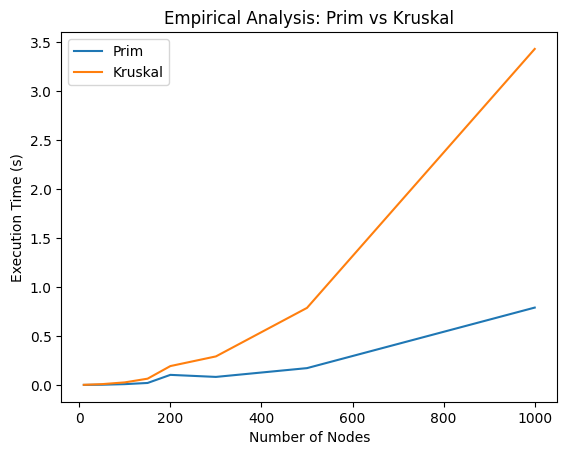

In [33]:

def display_results(num_nodes, prim_times, kruskal_times):
    headers = ["Number of Nodes", "Prim Execution Time (s)", "Kruskal Execution Time (s)"]
    data = zip(num_nodes, prim_times, kruskal_times)
    table = tabulate(data, headers=headers, floatfmt=".5f", tablefmt="grid")
    print(table)

def plot_results(num_nodes, prim_times, kruskal_times):
    plt.plot(num_nodes, prim_times, label='Prim')
    plt.plot(num_nodes, kruskal_times, label='Kruskal')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (s)')
    plt.title('Empirical Analysis: Prim vs Kruskal')
    plt.legend()
    plt.show()
    
display_results(num_nodes, prim_times, kruskal_times)
plot_results(num_nodes, prim_times, kruskal_times)
